In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 데이터 불러오기
respec_final = pd.read_csv('/Users/sungahwang/Desktop/BigContest_data/respec_final_XGB.csv')
respec_final

,Unnamed: 0,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade
0,1,954900,553686,1.0,2022-06-07 14:29:03,30000000.0,개인사업자,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,50.0,16.0,3.0
1,2,137274,59516,1.0,2022-06-07 21:40:22,30000000.0,프리랜서,기타,기타가족소유,10000000.0,생활비,1.0,1.0,5.0,15000000.0,20.0,2.0,5.0
2,3,1570936,167320,1.0,2022-06-07 09:40:27,62000000.0,직장가입자(4대보험O),정규직,자가,2000000.0,생활비,1.0,1.0,7.0,344000000.0,30.0,6.0,4.0
3,4,967833,33400,1.0,2022-06-07 08:55:07,36000000.0,직장가입자(4대보험O),정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,20.0,2.0,6.0
4,6,1614045,860410,1.0,2022-06-07 11:29:05,45000000.0,기타소득,기타,자가,15000000.0,대환대출,1.0,0.0,1.0,20000000.0,40.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1394211,1864587,489900,1.0,2022-03-22 14:55:32,25000000.0,프리랜서,기타,기타가족소유,5000000.0,사업자금,0.0,0.0,0.0,0.0,20.0,2.0,7.0
968749,1394212,1327066,151422,1.0,2022-03-22 01:19:24,20000000.0,기타소득,기타,자가,50000000.0,생활비,0.0,1.0,1.0,43500000.0,60.0,6.0,1.0
968750,1394213,1319606,173524,1.0,2022-03-22 07:34:32,75000000.0,직장가입자(4대보험O),정규직,자가,100000000.0,대환대출,1.0,1.0,8.0,200000000.0,40.0,14.0,5.0
968751,1394214,1482466,766546,1.0,2022-03-22 22:12:35,50000000.0,직장가입자(4대보험O),정규직,자가,10000000.0,대환대출,0.0,1.0,10.0,117000000.0,40.0,6.0,6.0


In [3]:
respec_final = respec_final.drop(['Unnamed: 0'], axis = 1)

In [4]:
data = respec_final.drop(columns=['application_id','user_id','insert_time'])

In [5]:
from sklearn.preprocessing import PowerTransformer

In [6]:
for c in data.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    data[c] =  pt.fit_transform(np.array(data[c]).reshape(-1, 1))

In [7]:
from kmodes.kprototypes import KPrototypes

In [11]:
cost = []
for cluster in range(1,7):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_init=2,verbose= 1)
    kproto.fit(data, categorical= [0,2,3,4,6,7,8])
    cost.append(kproto.cost_)

1\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 8094969.999999545
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 8094969.999999545
Best run was number 1
2\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 210581, ncost: 7268666.538281686
Run: 1, iteration: 2/100, moves: 153934, ncost: 7091444.4966895655
Run: 1, iteration: 3/100, moves: 71698, ncost: 7059260.246666497
Run: 1, iteration: 4/100, moves: 29385, ncost: 7053108.73542952
Run: 1, iteration: 5/100, moves: 22465, ncost: 7046566.43120176
Run: 1, iteration: 6/100, moves: 30726, ncost: 7033439.748646006
Run: 1, iteration: 7/100, moves: 54239, ncost: 6995634.882611494
Run: 1, iteration: 8/100, moves: 56163, ncost: 6960569.160463431
Run: 1, iteration: 9/100, moves: 56553, ncost: 6924075.034801

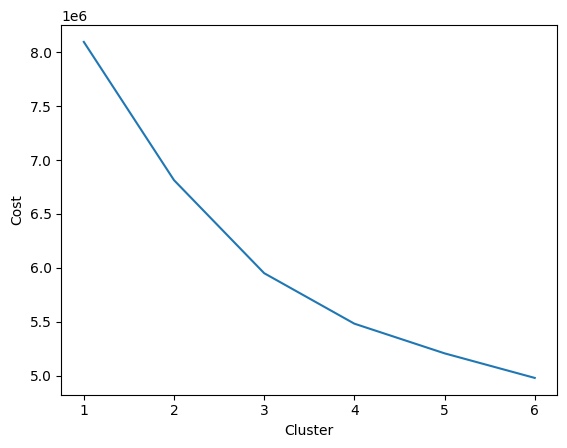

In [12]:
plt.plot(range(1,7),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

In [8]:
cost = []
for cluster in range(7,11):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_init=2,verbose= 1)
    kproto.fit(data, categorical= [0,2,3,4,6,7,8])
    cost.append(kproto.cost_)

7\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 440508, ncost: 5021711.09932742
Run: 1, iteration: 2/100, moves: 209078, ncost: 4857710.94883927
Run: 1, iteration: 3/100, moves: 92887, ncost: 4824224.564619149
Run: 1, iteration: 4/100, moves: 41614, ncost: 4817360.139579387
Run: 1, iteration: 5/100, moves: 21031, ncost: 4815516.3410098385
Run: 1, iteration: 6/100, moves: 12566, ncost: 4814827.022984673
Run: 1, iteration: 7/100, moves: 7946, ncost: 4814537.861404403
Run: 1, iteration: 8/100, moves: 5472, ncost: 4814388.514696338
Run: 1, iteration: 9/100, moves: 4238, ncost: 4814294.2820506375
Run: 1, iteration: 10/100, moves: 3594, ncost: 4814225.368951642
Run: 1, iteration: 11/100, moves: 3143, ncost: 4814173.597825513
Run: 1, iteration: 12/100, moves: 2466, ncost: 4814140.037401919
Run: 1, iteration: 13/100, moves: 2224, ncost: 4814113.289154067
Run: 1, iteration: 14/100, moves: 1905, ncost: 4814090.9705

Run: 1, iteration: 18/100, moves: 5785, ncost: 4673712.188133075
Run: 1, iteration: 19/100, moves: 4936, ncost: 4673486.746683351
Run: 1, iteration: 20/100, moves: 4173, ncost: 4673326.292684647
Run: 1, iteration: 21/100, moves: 3572, ncost: 4673217.018065615
Run: 1, iteration: 22/100, moves: 3431, ncost: 4673110.954532007
Run: 1, iteration: 23/100, moves: 3279, ncost: 4673027.268090385
Run: 1, iteration: 24/100, moves: 3156, ncost: 4672960.111768853
Run: 1, iteration: 25/100, moves: 2979, ncost: 4672909.058398448
Run: 1, iteration: 26/100, moves: 2640, ncost: 4672866.970293205
Run: 1, iteration: 27/100, moves: 2402, ncost: 4672832.420722234
Run: 1, iteration: 28/100, moves: 2318, ncost: 4672796.943224698
Run: 1, iteration: 29/100, moves: 7596, ncost: 4670329.522985914
Run: 1, iteration: 30/100, moves: 7532, ncost: 4669824.569821983
Run: 1, iteration: 31/100, moves: 5820, ncost: 4669456.157445625
Run: 1, iteration: 32/100, moves: 5192, ncost: 4669204.213830522
Run: 1, iteration: 33/100

Run: 2, iteration: 44/100, moves: 172, ncost: 4616212.426846199
Run: 2, iteration: 45/100, moves: 167, ncost: 4616212.120830112
Run: 2, iteration: 46/100, moves: 209, ncost: 4616211.865552055
Run: 2, iteration: 47/100, moves: 133, ncost: 4616211.733851744
Run: 2, iteration: 48/100, moves: 96, ncost: 4616211.663194109
Run: 2, iteration: 49/100, moves: 68, ncost: 4616211.634585876
Run: 2, iteration: 50/100, moves: 36, ncost: 4616211.621916689
Run: 2, iteration: 51/100, moves: 34, ncost: 4616211.6096046325
Run: 2, iteration: 52/100, moves: 27, ncost: 4616211.602140908
Run: 2, iteration: 53/100, moves: 10, ncost: 4616211.600276494
Run: 2, iteration: 54/100, moves: 3, ncost: 4616211.600059001
Run: 2, iteration: 55/100, moves: 0, ncost: 4616211.600059001
Best run was number 2
9\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 336877, ncost: 4686962.292299182
Run: 1, iteration: 2/100, moves: 124356, ncost: 4621542.

Run: 2, iteration: 51/100, moves: 262, ncost: 4514856.31016808
Run: 2, iteration: 52/100, moves: 199, ncost: 4514856.038774667
Run: 2, iteration: 53/100, moves: 187, ncost: 4514855.762315209
Run: 2, iteration: 54/100, moves: 160, ncost: 4514855.430475111
Run: 2, iteration: 55/100, moves: 155, ncost: 4514855.146322525
Run: 2, iteration: 56/100, moves: 66, ncost: 4514855.095397655
Run: 2, iteration: 57/100, moves: 32, ncost: 4514855.079091688
Run: 2, iteration: 58/100, moves: 36, ncost: 4514855.066857278
Run: 2, iteration: 59/100, moves: 21, ncost: 4514855.060400615
Run: 2, iteration: 60/100, moves: 35, ncost: 4514855.045683554
Run: 2, iteration: 61/100, moves: 52, ncost: 4514855.0116614215
Run: 2, iteration: 62/100, moves: 92, ncost: 4514854.852676152
Run: 2, iteration: 63/100, moves: 119, ncost: 4514854.749464084
Run: 2, iteration: 64/100, moves: 70, ncost: 4514854.723684727
Run: 2, iteration: 65/100, moves: 34, ncost: 4514854.713523834
Run: 2, iteration: 66/100, moves: 26, ncost: 4514

Run: 2, iteration: 6/100, moves: 37628, ncost: 4465189.650291602
Run: 2, iteration: 7/100, moves: 32580, ncost: 4459823.851109726
Run: 2, iteration: 8/100, moves: 29008, ncost: 4455478.773279386
Run: 2, iteration: 9/100, moves: 25715, ncost: 4452265.338582578
Run: 2, iteration: 10/100, moves: 21825, ncost: 4450086.080021772
Run: 2, iteration: 11/100, moves: 18610, ncost: 4448522.343992324
Run: 2, iteration: 12/100, moves: 16733, ncost: 4447230.42081633
Run: 2, iteration: 13/100, moves: 15565, ncost: 4446148.639776188
Run: 2, iteration: 14/100, moves: 14208, ncost: 4445260.231152067
Run: 2, iteration: 15/100, moves: 12722, ncost: 4444569.905752973
Run: 2, iteration: 16/100, moves: 16325, ncost: 4436918.748294754
Run: 2, iteration: 17/100, moves: 28292, ncost: 4435035.753350893
Run: 2, iteration: 18/100, moves: 11378, ncost: 4434371.688329449
Run: 2, iteration: 19/100, moves: 7748, ncost: 4434049.114719079
Run: 2, iteration: 20/100, moves: 5731, ncost: 4433878.943833276
Run: 2, iteration

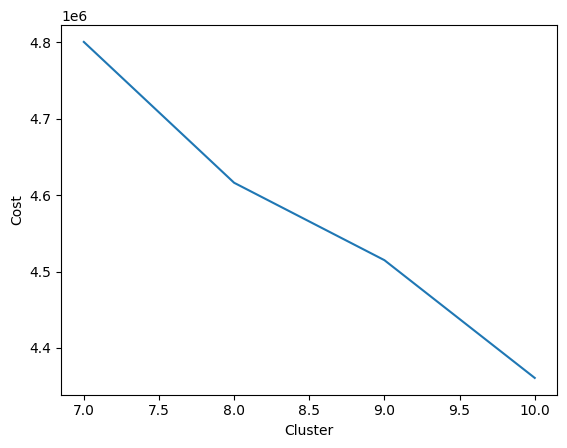

In [9]:
plt.plot(range(7,11),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()